# F

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Basics

In [3]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

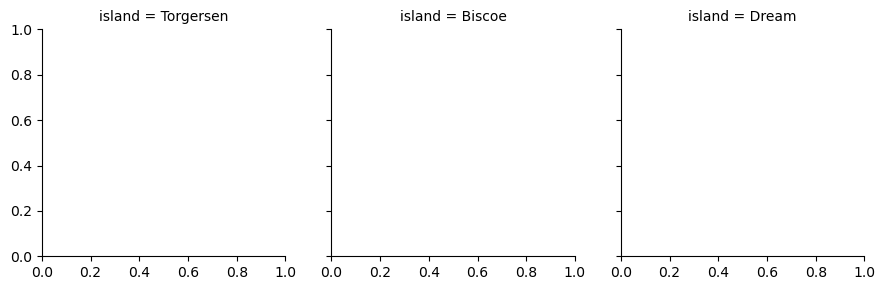

In [4]:
g = sns.FacetGrid(penguins, col='island')

In [5]:
type(g)

seaborn.axisgrid.FacetGrid

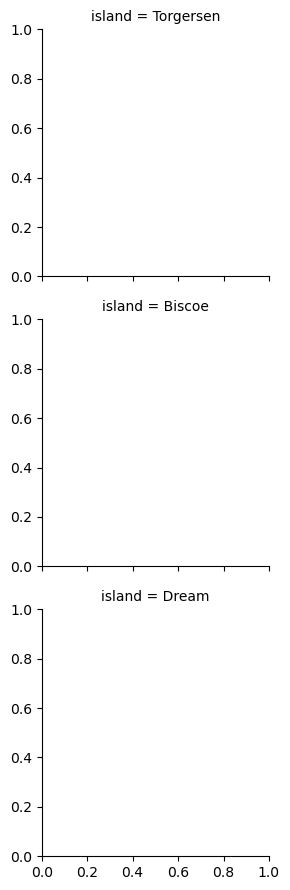

In [6]:
sns.FacetGrid(penguins, row='island')

# map

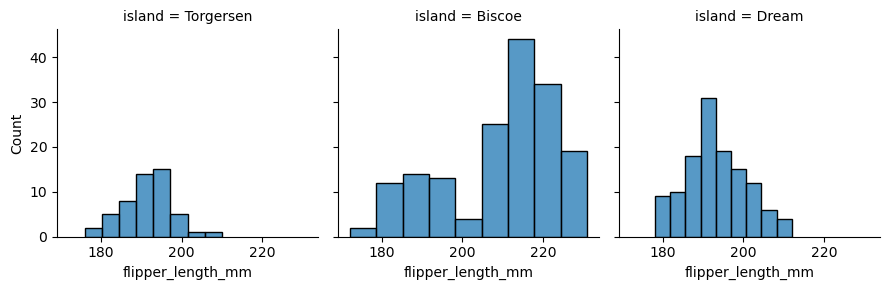

In [9]:
g = sns.FacetGrid(penguins, col='island')
g.map(sns.histplot, "flipper_length_mm")

# map_dataframe

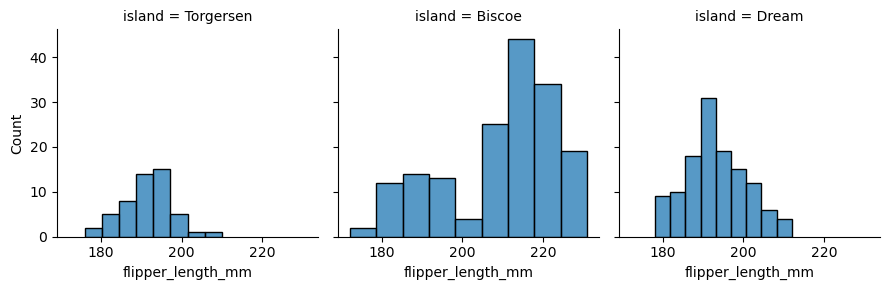

In [12]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, x='flipper_length_mm')

- **NOTE**: <br>
  in comparison with **.map()**, **x** and **y** can be assigned to the desired feature.

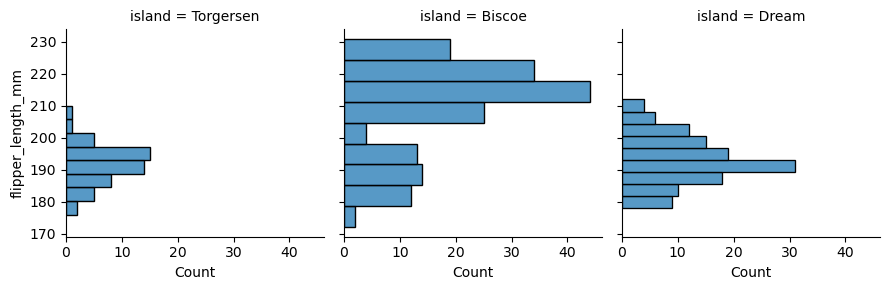

In [15]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.histplot, y='flipper_length_mm')

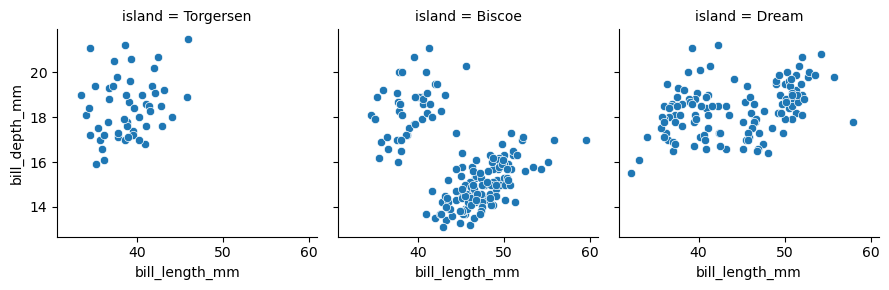

In [18]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')

# Methods and Attributes
- .set_axis_labels()
- .set_titles()
- sharey
- ylim

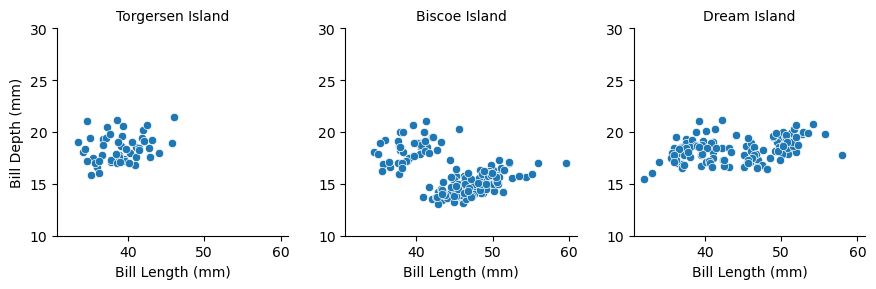

In [23]:
g = sns.FacetGrid(penguins, col='island', sharey=False, ylim=(10, 30))

g.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
g.set_axis_labels(x_var='Bill Length (mm)', y_var='Bill Depth (mm)')
g.set_titles(col_template='{col_name} Island')

# Hue, Palette

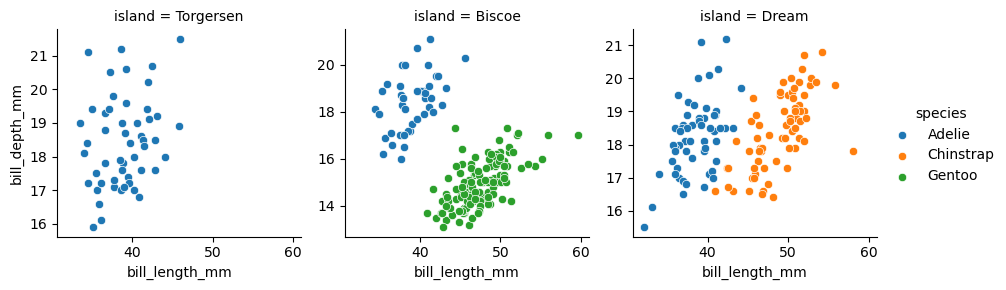

In [25]:
g = sns.FacetGrid(penguins, col='island', sharey=False, hue='species')
g.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
g.add_legend()

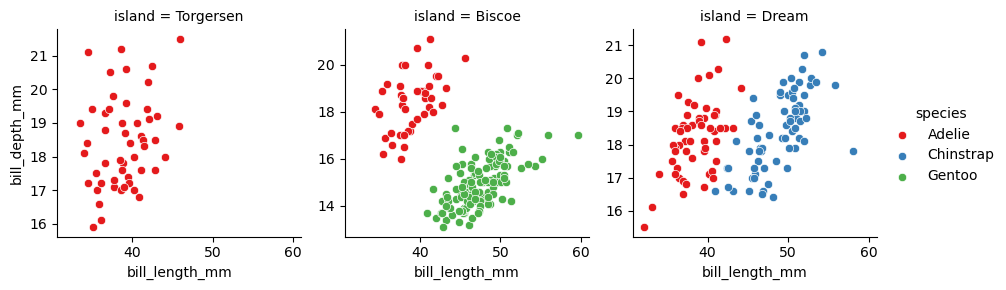

In [34]:
g = sns.FacetGrid(penguins, col='island', sharey=False, hue='species', palette='Set1')
g.map_dataframe(sns.scatterplot, x='bill_length_mm', y='bill_depth_mm')
g.add_legend()

# Custom Functions

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
def add_mean_line(data, var=None, **kwarg):
    # Ignore the fuction if no var provided
    if not var:
        return

    # Calculate mean for each group
    mean_value = np.mean(data[var])

    # Get current axes
    ax = plt.gca()

    # Add line at the mean
    ax.axvline(mean_value, color='green', lw=3, ls='--')

    # Annotate the group
    ax.text(0.7, 0.9,
            f'Mean: {mean_value:.0f}',
            transform=ax.transAxes,   # Transform positions to range from (0,0) to (1,1)
            color='green', fontweight='bold', fontsize=10)

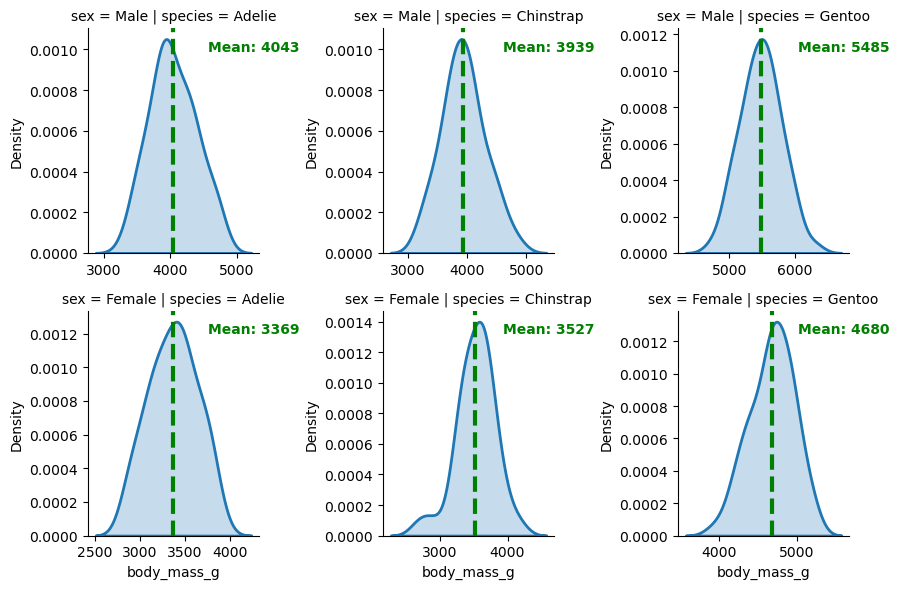

In [74]:
g = sns.FacetGrid(penguins, row='sex', col='species', sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x='body_mass_g', lw=2, fill=True)
g.map_dataframe(add_mean_line, var='body_mass_g')